**Note:** This is the base noteboook for task design. It includes both persist and pandas ask instructions

# Analyzing Video Games Across Genres

**Participant ID:**  
**Date / Time:**

# Introduction
Welcome to our data analysis study. For this study, you'll be working with a dataset sourced [Corgis Datasets Project](https://corgis-edu.github.io/corgis/).

The data was originally published in the publication [“What makes a blockbuster video game? An empirical analysis of US sales data.” Managerial and Decision Economics](https://researchportal.port.ac.uk/en/publications/what-makes-a-blockbuster-video-game-an-empirical-analysis-of-us-s) by Dr Joe Cox. 

The dataset has information about the sales and playtime of over a thousand video games released between 2004 and 2010. The playtime information was collected from crowd-sourced data on ["How Long to Beat"](https://howlongtobeat.com/).

#### Persist

- The PersIst extension is already installed and enabled in this notebook.
- To familiarize yourself with its functionalities, please refer to the provided [tutorial notebook](../tutorial.ipynb).
- Interactive charts and tables have been pre-created for your convenience. These can be directly utilized by running the corresponding cells.
- Focus on leveraging the interactive capabilities of Persist for your analysis.

#### Pandas

- Pandas is set up and ready for use, along with other Python libraries such as Matplotlib, Seaborn, and Altair for data visualization.
- You are allowed to use internet resources like documentation and forums, including Stack Overflow, to assist you in completing the tasks.

## Tasks Overview

In this study, you are presented with three fundamental data analysis tasks. Each task is designed to test different aspects of data analysis and manipulation.

- Carefully follow the step-by-step instructions provided for each task.
- As you work through the tasks, take note of any interesting findings or challenges you encounter.
- Feel free to add new code and markdown cells in the notebook as necessary to complete the tasks.
- Document your findings and any challenges faced during the analysis in markdown cells. This can include observations about the data, any issues encountered, and your overall experience with the task/method.

**Support**
- If you require assistance or need further clarification on any of the tasks, please let us know.
- If you find yourself stuck on a task and feel that you will not make any progress, you have the option to skip the task.
- For tasks that build upon the outputs of previous tasks, skipping a task might affect your ability to proceed. If you choose to skip a task, we can assist you by providing the necessary dataset or outputs required for the consecutive tasks.

In [83]:
import helpers as h
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

import persist_ext as PR

## Data Description

The table below describes the different columns in the dataset. Each row in the dataset represents a reported avalanche with details on location, trigger, and aspect. The data spans multiple years, starting from 2004 up to 2023.

| Column        | Description                                                                                                                                                           |
|---------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Title         | Full title of the game.                                                                                                                                               |
| Handheld      | Whether this is a hand-held game.                                                                                                                                     |
| Max Players   | The maximum number of players that can play this game.                                                                                                                |
| Multiplatform | Whether this game is available on multiple platforms.                                                                                                                 |
| Online        | Whether this game supports online play.                                                                                                                               |
| Genres        | The main genre that this game belongs to.                                                                                                                             |
| Licensed      | Whether this game was based off a previously licensed entity.                                                                                                         |
| Publishers    | The publishers who created this game.                                                                                                                                 |
| Sequel        | Whether this game is a sequel to another game.                                                                                                                        |
| Review Score  | A review score for this game, out of 100.                                                                                                                             |
| Sales         | The total sales made on this game, measured in millions of dollars.                                                                                                   |
| Used Price    | A typical "used" price for this game (i.e. previously returned and sold), measured in dollars.                                                                        |
| Console       | The name of the console that this particular game was released for. Note that the dataset contains multiple copies of the same game, released for different consoles. |
| Rating        | The ESRB rating for this game, either E (for Everyone), T (for Teen), or M (for Mature).                                                                              |
| Re-release    | Whether this game is a re-release of an earlier one.                                                                                                                  |
| Year          | The year that this game was released.                                                                                                                                 |
| CT_All        | The median time that players reported completing the game in any way, in hours. This is the median over all the other categories.                                     |
| CT_Comp       | The median time that players reported completing everything in the game, in hours.                                                                                    |
| CT_MainExtra  | The median time that players reported completing the main game and major extra parts of the game, in hours.                                                           |
| CT_MainOnly   | The median time that players reported completing the main game storyline, in hours.                                                                                   |

In [2]:
df = pd.read_csv('video_games.csv')
df.head()

,Title,Handheld?,Max Players,Multiplatform?,Online?,Genres,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Re-release?,Year,CT_All,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,True,2004,24.48,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,True,2004,10.00,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,True,2004,2.50,7.25,3.33,1.83
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,True,2004,-100.00,-100.00,-100.00,-100.00
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,True,2004,10.00,72.57,12.50,8.00


# Task 1: Column Names and Data Types

In the first task we will perform some basic data cleaning operations to get our dataset ready for further tasks.

### **Task 1a: Remove Columns**

#### **Objective**
Remove certain columns to streamline the dataset for further analysis.
- **_Re-release?:_** Boolean flag indicating if the game was a new release or a re-release.
- **_CT_All:_** Average of all other completition times, we will use one of the others directly

#### Persist

#### **Instructions**
1. **Column Removal:**
	- Use the interactive table feature in PersIst to remove the specified columns.
2. **Generate dataframe:**
	- Assign the modified dataframe to variable `df_task_1a`
3. **Show Output:**
	- Print the head of `df_task_1a` to show the changes.

In [5]:
PR.PersistTable(df)

PersistWidget(data_values=[{'__id_column': '1', 'Title': 'Super Mario 64 DS', 'Handheld?': True, 'Max Players'…

In [6]:
df_task_1a.head()

,Title,Handheld?,Max Players,Multiplatform?,Online?,Genres,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly,__annotations
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.0,25.0,14.5,No Annotation
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.0,9.75,10.0,No Annotation
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83,No Annotation
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,2004,-100.0,-100.0,-100.0,No Annotation
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.5,8.0,No Annotation


#### Pandas

#### **Instructions**
1. **Column Removal:**
	- Remove the specified columns using Pandas commands.
2. **Generate dataframe:**
	- Assign the modified dataframe to variable `df_task_1a`
3. **Show Output:**
	- Print the head of `df_task_1a` to show the changes.

In [7]:
df.head()

,Title,Handheld?,Max Players,Multiplatform?,Online?,Genres,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Re-release?,Year,CT_All,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,True,2004,24.48,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,True,2004,10.00,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,True,2004,2.50,7.25,3.33,1.83
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,True,2004,-100.00,-100.00,-100.00,-100.00
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,True,2004,10.00,72.57,12.50,8.00


In [8]:
df_task_1a = df.drop(columns=["Re-release?", "CT_All"])

df_task_1a.head()

,Title,Handheld?,Max Players,Multiplatform?,Online?,Genres,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,2004,-100.00,-100.00,-100.00
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.50,8.00


### **Task 1b: Fix Column Names**

#### **Objective**
For this subtask, we will focus on fixing column names to ensure consistency and clarity. We'll start by identifying the issues with the column names, specifically targeting those with a `?` suffix that needs removal.

#### Persist

#### **Instructions**
1. **Rename Columns:**
    - Use the interactive  table in Persist to correct the column names by removing the trailing `?` from their names:
        - _Handheld?_ → _Handheld_
        - _Licensed?_ → _Licensed_
        - _Multiplatform?_ → _Multiplatform_
        - _Online?_ → _Online_
2. **Generate dataframe:**
    - Assign the revised dataframe to the variable `df_task_1b`.
3. **Show Output:**
    - Display the head of `df_task_1b` to verify the changes.

In [14]:
PR.PersistTable(df_task_1a)

PersistWidget(data_values=[{'__id_column': '1', 'Title': 'Super Mario 64 DS', 'Handheld?': True, 'Max Players'…

In [15]:
df_task_1b.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly,__annotations
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.0,25.0,14.5,No Annotation
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.0,9.75,10.0,No Annotation
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83,No Annotation
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,2004,-100.0,-100.0,-100.0,No Annotation
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.5,8.0,No Annotation


#### Pandas

#### **Instructions**
1. **Rename Columns:**
    - Employ Pandas commands to rename the columns, eliminating the trailing "?" as specified:
        - _Handheld?_ → _Handheld_
        - _Licensed?_ → _Licensed_
        - _Multiplatform?_ → _Multiplatform_
        - _Online?_ → _Online_
2. **Generate dataframe:**
    - Assign the updated dataframe to variable `df_task_1b`.
3. **Show Output:**
    - Print the head of `df_task_1b` to confirm the updated column names.

In [16]:
df_task_1a.head()

,Title,Handheld?,Max Players,Multiplatform?,Online?,Genres,Licensed?,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,2004,-100.00,-100.00,-100.00
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.50,8.00


In [19]:
# Renaming columns to remove the leading ';'
df_task_1b = df_task_1a.rename(columns={
    "Handheld?": "Handheld",
    "Multiplatform?": "Multiplatform",
    "Online?": "Online",
    "Licensed?": "Licensed",
})

df_task_1b.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,2004,-100.00,-100.00,-100.00
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.50,8.00


## **Task 1c: Correcting Data Type of 'Depth_inches'**

#### **Objective**
In this task, we will address a data type issue in the `Max Players` column of our dataframe. We want to convert the data type of the column to `category`. However, the dataset has duplicate category values due to typos.

For e.g. for `Max Players` supported some columns have value of `1` and some have value of `1P` which are both the same.

Remove any trailing `P`s from the `Max Players` column.

In [23]:
df_task_1b.dtypes

Title             object
Handheld            bool
Max Players       object
Multiplatform       bool
Online              bool
Genres            object
Licensed            bool
Publishers        object
Sequel              bool
Review Score       int64
Sales            float64
Used Price       float64
Console           object
Rating            object
Year               int64
CT_Comp          float64
CT_MainExtra     float64
CT_MainOnly      float64
dtype: object

### **Persist**

#### **Instructions**
1. **Convert `Max Players` column to category:**
    - Use the column header to switch data type of the `Max Players` column.
2. **`Edit Categories` pop-up:**
    - Inspect the `Edit Categories` pop-up in the toolbar. Note the incorrect values (e.g. `1P`).
3. **Edit and Correct Entries:**
    - Search for the cells having an incorrect option using the search box.
    - Edit the cells to remove the trailing `P` (e.g. `1P` to `1`)
4. **Generate Dataframe:**
    - Assign the modified dataframe to a variable `df_task_1c`.
5. **Show Output:**
    - Display the dtypes of `df_task_1c` to verify the data type correction.

In [22]:
PR.PersistTable(df_task_1b)

PersistWidget(data_values=[{'__id_column': '1', 'Title': 'Super Mario 64 DS', 'Handheld': True, 'Max Players':…

In [24]:
df_task_1c.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly,__annotations
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.0,25.0,14.5,No Annotation
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.0,9.75,10.0,No Annotation
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83,No Annotation
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,0.49,12.95,Sony PSP,E,2004,-100.0,-100.0,-100.0,No Annotation
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.5,8.0,No Annotation


In [25]:
df_task_1c.dtypes

Title            string[python]
Handheld                boolean
Max Players            category
Multiplatform           boolean
Online                  boolean
Genres           string[python]
Licensed                boolean
Publishers       string[python]
Sequel                  boolean
Review Score              Int64
Sales                   Float64
Used Price              Float64
Console                category
Rating                 category
Year                      Int64
CT_Comp                 Float64
CT_MainExtra            Float64
CT_MainOnly             Float64
__annotations    string[python]
dtype: object

### **Pandas**

#### **Instructions**
1. **Convert `Max Players` column to category:**
    - Use pandas to switch data type of the `Max Players` column.
2. **Inspect unique values in `Max Players`:**
    - Print and inspect the column to note the incorrect values (e.g. `1P`).
3. **Edit and Correct Entries:**
    - Edit the cells having an incorrect option to remove the trailing `P` (e.g. `1P` to `1`)
4. **Generate Dataframe:**
    - Assign the modified dataframe to a variable `df_task_1c`.
5. **Show Output:**
    - Display the dtypes of `df_task_1c` to verify the data type correction.

In [26]:
df_task_1b.dtypes

Title             object
Handheld            bool
Max Players       object
Multiplatform       bool
Online              bool
Genres            object
Licensed            bool
Publishers        object
Sequel              bool
Review Score       int64
Sales            float64
Used Price       float64
Console           object
Rating            object
Year               int64
CT_Comp          float64
CT_MainExtra     float64
CT_MainOnly      float64
dtype: object

In [30]:
df_task_1c = df_task_1b
df_task_1c["Max Players"] = df_task_1c["Max Players"].astype('category')
df_task_1c["Max Players"] = df_task_1c["Max Players"].apply(lambda x: x[:-1] if "P" in x else x)
df_task_1c["Max Players"].cat.categories

Index(['1', '2', '4', '6', '7', '8'], dtype='object')

In [31]:
df_task_1c.dtypes

Title              object
Handheld             bool
Max Players      category
Multiplatform        bool
Online               bool
Genres             object
Licensed             bool
Publishers         object
Sequel               bool
Review Score        int64
Sales             float64
Used Price        float64
Console            object
Rating             object
Year                int64
CT_Comp           float64
CT_MainExtra      float64
CT_MainOnly       float64
dtype: object

# Task 2: Filtering data

In Task 2, we further improve our data by removing outliers and removing certain records to have more consistent data. 

We will also take a brief look at relations between cause of an avalanche (`Trigger`) and failure point of ice (`Weak Layer`)

## **Task 2a: Remove Outliers**

#### **Objective**
In this task, we address data accuracy by filtering out anomalies in the completion time for the main story of game.

We observe some records with negative values for completion time, which is obviously incorrect data.

Remove records with negative completion time.

#### Persist

#### **Instructions**
1. **Identify and Remove Anomalies:**
    - Interactively select data points negative value for `CT_MainOnly`.
    - Use Persist's interactive features to remove these anomalous records.
2. **Generate Dataframe:**
    - Assign the cleaned dataframe to a variable `df_task_2a`.
3. **Show Output:**
    - Display the head of `df_task_2a`.

In [32]:
PR.plot.scatterplot(df_task_1c, "CT_MainOnly:Q", "Review Score:Q")

PersistWidget(data_values=[{'__id_column': '1', 'Title': 'Super Mario 64 DS', 'Handheld': True, 'Max Players':…

In [35]:
df_task_2a.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly,__annotations
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.0,25.0,14.5,No Annotation
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.0,9.75,10.0,No Annotation
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83,No Annotation
3,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.5,8.0,No Annotation
4,The Urbz: Sims in the City,True,1,True,True,Simulation,True,EA,True,67,0.41,12.95,Nintendo DS,M,2004,30.03,20.0,15.5,No Annotation


#### Pandas

#### **Instructions**
1. **Locate Anomalous Data:**
    - Refer to the _seaborn_ scatterplot for `CT_MainOnly` vs `Review Score`
    - Write code to identify records where `CT_MainOnly` is `-ve`.
3. **Remove Anomalies:**
    - Use Pandas commands to filter out these anomalous records from the dataframe.
4. **Generate Dataframe:**
    - Save the cleaned dataframe as `df_task_2a`.
5. **Plot Output:**
    - Recreate the scatterplot from step 1 in a new cell using `df_task_2a`.
    - Print the head of `df_task_2a`.

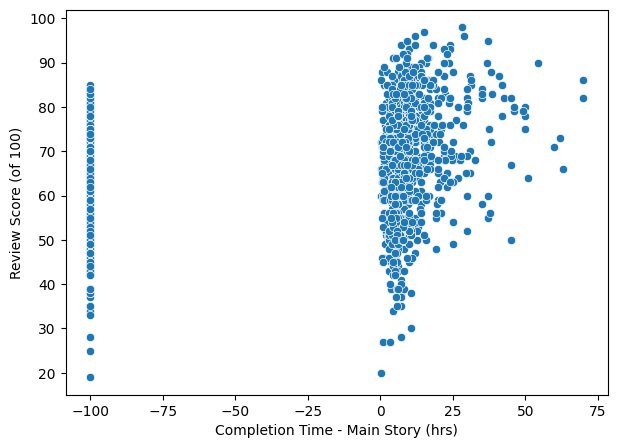

In [36]:
df_task_2a = df_task_1c

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_task_2a, x='CT_MainOnly', y='Review Score')

plt.xlabel('Completion Time - Main Story (hrs)')
plt.ylabel('Review Score (of 100)')

# Display the plot
plt.show()

In [37]:
df_task_2a = df_task_1c[df_task_1c['CT_MainOnly'] >= 0]
df_task_2a.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,4.69,24.95,Nintendo DS,E,2004,30.00,25.00,14.50
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,0.56,14.95,Sony PSP,E,2004,-100.00,9.75,10.00
2,WarioWare Touched!,True,2,True,True,Action,True,Nintendo,True,81,0.54,22.95,Nintendo DS,E,2004,7.25,3.33,1.83
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,0.45,14.95,Nintendo DS,E,2004,72.57,12.50,8.00
5,The Urbz: Sims in the City,True,1,True,True,Simulation,True,EA,True,67,0.41,12.95,Nintendo DS,M,2004,30.03,20.00,15.50


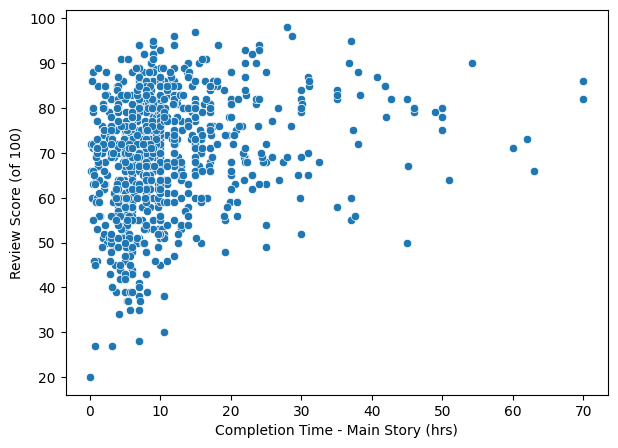

In [38]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_task_2a, x='CT_MainOnly', y='Review Score')

plt.xlabel('Completion Time - Main Story (hrs)')
plt.ylabel('Review Score (of 100)')

# Display the plot
plt.show()

## **Task 2b: Filtering Out Old Data**

The interactive barchart below, shows the data aggregated by year. There are noticeably fewer records for `2004` and `2005`.

During this subtask we will remove these older records, keeping only the records post 2006.

### Persist

#### **Instructions**
1. **Create and Analyze Bar Chart:**
    - Looking at an interactive bar chart in Persist showing the number of video games released each year, identify the bars showing data we want.
2. **Interactive Year Selection:**
    - Use a brush to interactively select and remove appropriate records.
3. **Generate Dataframe:**
    - Assign the refined dataframe to a variable `df_task_2b`. 
4. **Show Output:**
    - Display the head of `df_task_2b` to verify the removal of earlier years.

In [39]:
PR.plot.barchart(df_task_2a, "Year:O", "count()", selection_type="interval")

PersistWidget(data_values=[{'__id_column': '1', 'Title': 'Super Mario 64 DS', 'Handheld': True, 'Max Players':…

In [40]:
df_task_2b.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly,__annotations
0,Wii Play,True,2,True,True,Action,True,Nintendo,True,58,14.66,14.95,Nintendo Wii,T,2006,-100.0,11.42,4.0,No Annotation
1,New Super Mario Bros.,True,1,True,True,Action,True,Nintendo,True,89,10.03,27.95,Nintendo DS,T,2006,15.5,10.0,7.0,No Annotation
2,Pokmon Diamond,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,27.95,Nintendo DS,E,2006,220.0,80.0,41.92,No Annotation
3,Pokmon Pearl,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,26.95,Nintendo DS,E,2006,220.0,80.0,41.92,No Annotation
4,Gears of War,True,2,True,True,Action,True,Microsoft,True,94,3.7,19.95,X360,M,2006,15.0,11.0,9.0,No Annotation


### Pandas

#### **Instructions**
1. **Bar Chart with Seaborn:**
    - Use the Seaborn plot with bar chart visualizing the number of video games released that year year. 
2. **Identify Sparse Years:**
    - Based on the bar chart, identify years before `2006` with fewer records.
3. **Code to Filter Out Sparse Years:**
    - Write Pandas code to exclude these years from the dataset.
4. **Show Output:**
    - Print the head of `df_task_2b` and optionally recreate the bar chart to show the dataset focusing on years 2006 and onwards.


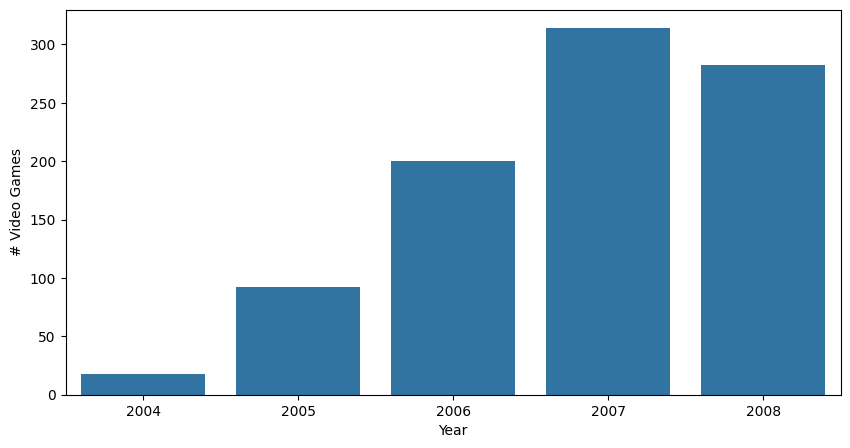

In [42]:
df_task_2b = df_task_2a
df_task_2b = df_task_2b.convert_dtypes()

plt.figure(figsize=(10, 5))
sns.countplot(x=df_task_2b["Year"])

plt.xlabel('Year')
plt.ylabel('# of Video Games')

# Display the plot
plt.show()

In [43]:
df_task_2b = df_task_2b[df_task_2b["Year"] >= 2006]
df_task_2b.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
156,Wii Play,True,2,True,True,Action,True,Nintendo,True,58,14.66,14.95,Nintendo Wii,T,2006,-100.0,11.42,4.0
157,New Super Mario Bros.,True,1,True,True,Action,True,Nintendo,True,89,10.03,27.95,Nintendo DS,T,2006,15.5,10.0,7.0
158,Pokmon Diamond,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,27.95,Nintendo DS,E,2006,220.0,80.0,41.92
159,Pokmon Pearl,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,26.95,Nintendo DS,E,2006,220.0,80.0,41.92
160,Gears of War,True,2,True,True,Action,True,Microsoft,True,94,3.7,19.95,X360,M,2006,15.0,11.0,9.0


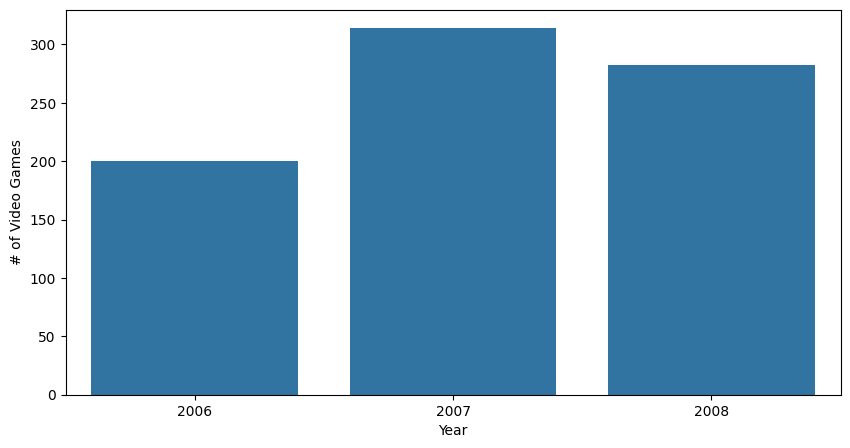

In [44]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df_task_2b["Year"])

plt.xlabel('Year')
plt.ylabel('# of Video Games')

# Display the plot
plt.show()

In [45]:
df_task_2b.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly
156,Wii Play,True,2,True,True,Action,True,Nintendo,True,58,14.66,14.95,Nintendo Wii,T,2006,-100.0,11.42,4.0
157,New Super Mario Bros.,True,1,True,True,Action,True,Nintendo,True,89,10.03,27.95,Nintendo DS,T,2006,15.5,10.0,7.0
158,Pokmon Diamond,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,27.95,Nintendo DS,E,2006,220.0,80.0,41.92
159,Pokmon Pearl,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,26.95,Nintendo DS,E,2006,220.0,80.0,41.92
160,Gears of War,True,2,True,True,Action,True,Microsoft,True,94,3.7,19.95,X360,M,2006,15.0,11.0,9.0


## **Task 2c: Identifying top `Publishers` for `Genres` _'Racing'_ and _'RPG'_**

### Persist

#### **Instructions**
1. **Linked Bar Charts:**
    - You will start with two linked interactive bar charts: one for `Genres` and another for `Publishers`.
    - Both bar charts show `count` for their respective category.
    - You can click on a trigger in the `Genres` bar chart and the `Publishers`' bar chart dynamically updates to show only games corresponding to the selected genre.
2. **Interactive Selection:**
    - Interactively select genres and use the updated `Publishers` bar chart.
3. **Identify the most frequent failure point:**
    - Analyze the filtered `Publishers` bar chart to determine the top publishers for the selected genre and make a note in a markdown cell about both the name of the publisher and number of games published. If the top publisher is `Unknown` note the next highest.
4. **Generate Dataframe and Output:**
    - You will not generate any dataframe for this task. NOTE: Please save the notebook after you are finsihed with interactions. 

In [47]:
pts = alt.selection_point(name="selector", encodings=['x'])

base = alt.Chart(df_task_2b).encode(y="count()")


publishers = base.mark_bar().encode(
    x="Publishers:N",
    color="Publishers:N",
    tooltip="count()"
).transform_filter(pts)

genre = base.mark_bar().encode(
    x="Genres:N",
    color=alt.condition(pts, "Genres:N", alt.value("#ddd")),
    tooltip="count()"
).add_params(pts)

chart = alt.hconcat(
 genre , publishers
).resolve_scale(
    color="independent",
)

PR.PersistChart(chart, data=df_task_2b)

PersistWidget(data_values=[{'__id_column': '157', 'Title': 'Wii Play', 'Handheld': True, 'Max Players': 2, 'Mu…

**Task 2c Notes:**

- Racing -> EA (10)
- RPG -> SquareEnix (14)

### Pandas

#### **Instructions**
1. **Identify Predominant `Publishers`:**
    - Determine the top publisher for `Racing` and `RPG` genres.
2. **Output:**
    - Note in markdown cell both the name of the publisher and number of games for each genre.

In [ ]:
df_task_2b.head()

In [51]:
_df = df_task_2b[df_task_2b["Genres"].isin(["Racing / Driving", "Role-Playing (RPG)"])]
grouped_size_df = _df[["Genres", "Publishers", "Year"]].groupby(["Genres", "Publishers"]).size().reset_index(name="counts")

grouped_size_df.sort_values(["Genres", "counts"], ascending=[True, False])

,Genres,Publishers,counts
2,Racing / Driving,EA,10
9,Racing / Driving,THQ,8
11,Racing / Driving,Unknown,8
5,Racing / Driving,Nintendo,3
0,Racing / Driving,Atari,2
1,Racing / Driving,Disney,2
3,Racing / Driving,Microsoft,2
6,Racing / Driving,Rockstar,2
7,Racing / Driving,Sega,2
8,Racing / Driving,Sony,2


**Task 2c Notes:**

- Racing -> EA (10)
- RPG -> SquareEnix (14)

## Task 3: Data Wrangling

### Task 3a: Creating and assigning `'Length'` category**

#### **Objective**

In this subtask, we'll introduce a new categorical variable named `Length` into our dataset. We already have `CT_MainOnly` but it would be useful to have the games grouped into `Short`, `Average` and `Long` category.

We will create a new category `Length` in the dataset and assign each record to `Short`, `Average` and `Long` based on its `CT_MainOnly` value.

### Persist

#### **Instructions**
1. **Visualization**
    - We will work with an interactive scatterplot in Persist showing the `CT_MainOnly` and `Review Score`.
2. **Define Season Categories:**
    - You will first create a new category called `Length` using the `Edit Categories` button in the header.
    - In the same menu you will add three options for this category: `Short`, `Average` and `Long`.
3. **Interactive Assignment:**
    - Use Persist's interactive features to select games and assign it to one of the `Length` values (Short, Average, Long).
    - You should use the following ranges for assigning proper categories:
        - `Short`: 0 - 20 hours
    	- `Average`: 21 - 40 hours,
    	- `Long`: more than 40 hours
4. **Generate Dataframe:**
    - Assign the updated dataset to a new variable: `df_task_3a`.
5. **Show Output:**
    - Print the head of the dataframe.

In [69]:
PR.plot.scatterplot(df_task_2b, "CT_MainOnly:Q", "Review Score:Q")

PersistWidget(data_values=[{'__id_column': '157', 'Title': 'Wii Play', 'Handheld': True, 'Max Players': 2, 'Mu…

In [53]:
df_task_3a.head()

,Length,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly,__annotations
156,Short,Wii Play,True,2,True,True,Action,True,Nintendo,True,58,14.66,14.95,Nintendo Wii,T,2006,-100.0,11.42,4.0,No Annotation
157,Short,New Super Mario Bros.,True,1,True,True,Action,True,Nintendo,True,89,10.03,27.95,Nintendo DS,T,2006,15.5,10.0,7.0,No Annotation
158,Long,Pokmon Diamond,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,27.95,Nintendo DS,E,2006,220.0,80.0,41.92,No Annotation
159,Long,Pokmon Pearl,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,26.95,Nintendo DS,E,2006,220.0,80.0,41.92,No Annotation
160,Short,Gears of War,True,2,True,True,Action,True,Microsoft,True,94,3.7,19.95,X360,M,2006,15.0,11.0,9.0,No Annotation


### **Pandas**

#### **Instructions**
1. **Create New Variable:**
    - Add a new column `Length` to the DataFrame.
2. **Assign Category:**
    - Using the `CT_MainOnly` value assign proper values to the new category.
    - You should use the following ranges for assigning proper categories:
        - `Short`: 0 - 20 hours
    	- `Average`: 21 - 40 hours,
    	- `Long`: more than 40 hours
3. **Generate Dataframe:**
    - Save the modified DataFrame with the new `Length` category to `df_task_3a`.
4. **Show Output:**
    - Display the head of `df_task_3a` to confirm the addition and categorization of the new variable.

In [71]:
df_task_3a = df_task_2b.copy()

In [72]:
df_task_3a["Length"] = "Average"

In [73]:
df_task_3a.loc[df_task_3a["CT_MainOnly"] <= 20, "Length"] = "Short"
df_task_3a.loc[df_task_3a["CT_MainOnly"] > 40, "Length"] = "Long"

df_task_3a.head()

,Title,Handheld,Max Players,Multiplatform,Online,Genres,Licensed,Publishers,Sequel,Review Score,Sales,Used Price,Console,Rating,Year,CT_Comp,CT_MainExtra,CT_MainOnly,Length
156,Wii Play,True,2,True,True,Action,True,Nintendo,True,58,14.66,14.95,Nintendo Wii,T,2006,-100.0,11.42,4.0,Short
157,New Super Mario Bros.,True,1,True,True,Action,True,Nintendo,True,89,10.03,27.95,Nintendo DS,T,2006,15.5,10.0,7.0,Short
158,Pokmon Diamond,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,27.95,Nintendo DS,E,2006,220.0,80.0,41.92,Long
159,Pokmon Pearl,True,1,True,True,Role-Playing (RPG),True,Nintendo,True,85,6.77,26.95,Nintendo DS,E,2006,220.0,80.0,41.92,Long
160,Gears of War,True,2,True,True,Action,True,Microsoft,True,94,3.7,19.95,X360,M,2006,15.0,11.0,9.0,Short


# **Task 3b:## **Finding Top Genre for each `Length`**

#### **Objective**
In this subtask, we'll analyze which Genre is most prevalent for games in different lengths (Short, Average, Long) using the `Length` category created in Task 3a.

### **Persist**

#### **Instructions**
1. **Visualization:**
    - We have two linked interactive bar charts: one for `Length` and another for `Genres`.
    - You can select a length to highlight using the legend for `Length` bar chart. The `Genres` bar chart will dynamically update in response to your selections.
2. **Analyze Genres Data:**
    - Observe the filtered `Genres` bar chart to identify the top genre for the selected length.
    - You can hover on the bars to get the exact frequency.
3. **Document Findings:**
    - Note down the most common genre for each length based on your interactive analysis in a new markdown cell.

In [80]:
select = alt.selection_point(name="s", fields=["Length"], bind="legend")

base = alt.Chart(df_task_3a).mark_bar()

length = base.encode(
    x=alt.X("Length:N").sort(["Short", "Average", "Long"]),
    y="count()",
    color=alt.condition(select, alt.Color("Length:N").sort(["Short", "Average", "Long"]), alt.value("gray"))
).add_params(select).properties(width=300)

years = base.encode(
    x="Genres:N",
    y="count()",
    color="Genres:N",
    tooltip="count()"
).transform_filter(select)

chart = length | years

chart = chart.resolve_scale(
    color="independent"
)

PR.PersistChart(chart, data=df_task_3a)

PersistWidget(data_values=[{'__id_column': '157', 'Title': 'Wii Play', 'Handheld': True, 'Max Players': 2, 'Mu…

**Task 3b Notes:**

- Short -> Action (521)
- Average -> RPG (34)
- Long -> RPG (14)

### **Pandas**

#### **Instructions**
1. **Analyze Genres by Length:**
	- Determine the most genre for each length category.
2. **Present Findings:**
	- Note in markdown cell both the name of the genre and number of recors for each length.

In [81]:
grouped_size_df = df_task_3a[["Length", "Genres", "Year"]].groupby(["Length", "Genres"]).size().reset_index(name="counts")

grouped_size_df.sort_values(["Length", "counts"], ascending=[True, False])

,Length,Genres,counts
3,Average,Role-Playing (RPG),34
0,Average,Action,27
2,Average,Racing / Driving,7
5,Average,Strategy,5
1,Average,Adventure,3
4,Average,Simulation,1
9,Long,Role-Playing (RPG),14
8,Long,Racing / Driving,2
6,Long,Action,1
7,Long,Adventure,1


**Notes:**
- Short ->	Action	(521)
- Average -> RPG	(34)
- Long -> RPG	(14)